In [1]:
import pandas as pd
from matplotlib import pyplot as plt, gridspec, ticker, dates
import time
import seaborn as sns

sns.set_style("darkgrid")

In [2]:
data = pd.read_csv("./posts/skierg-marathon/concept2-result-79965221.csv")


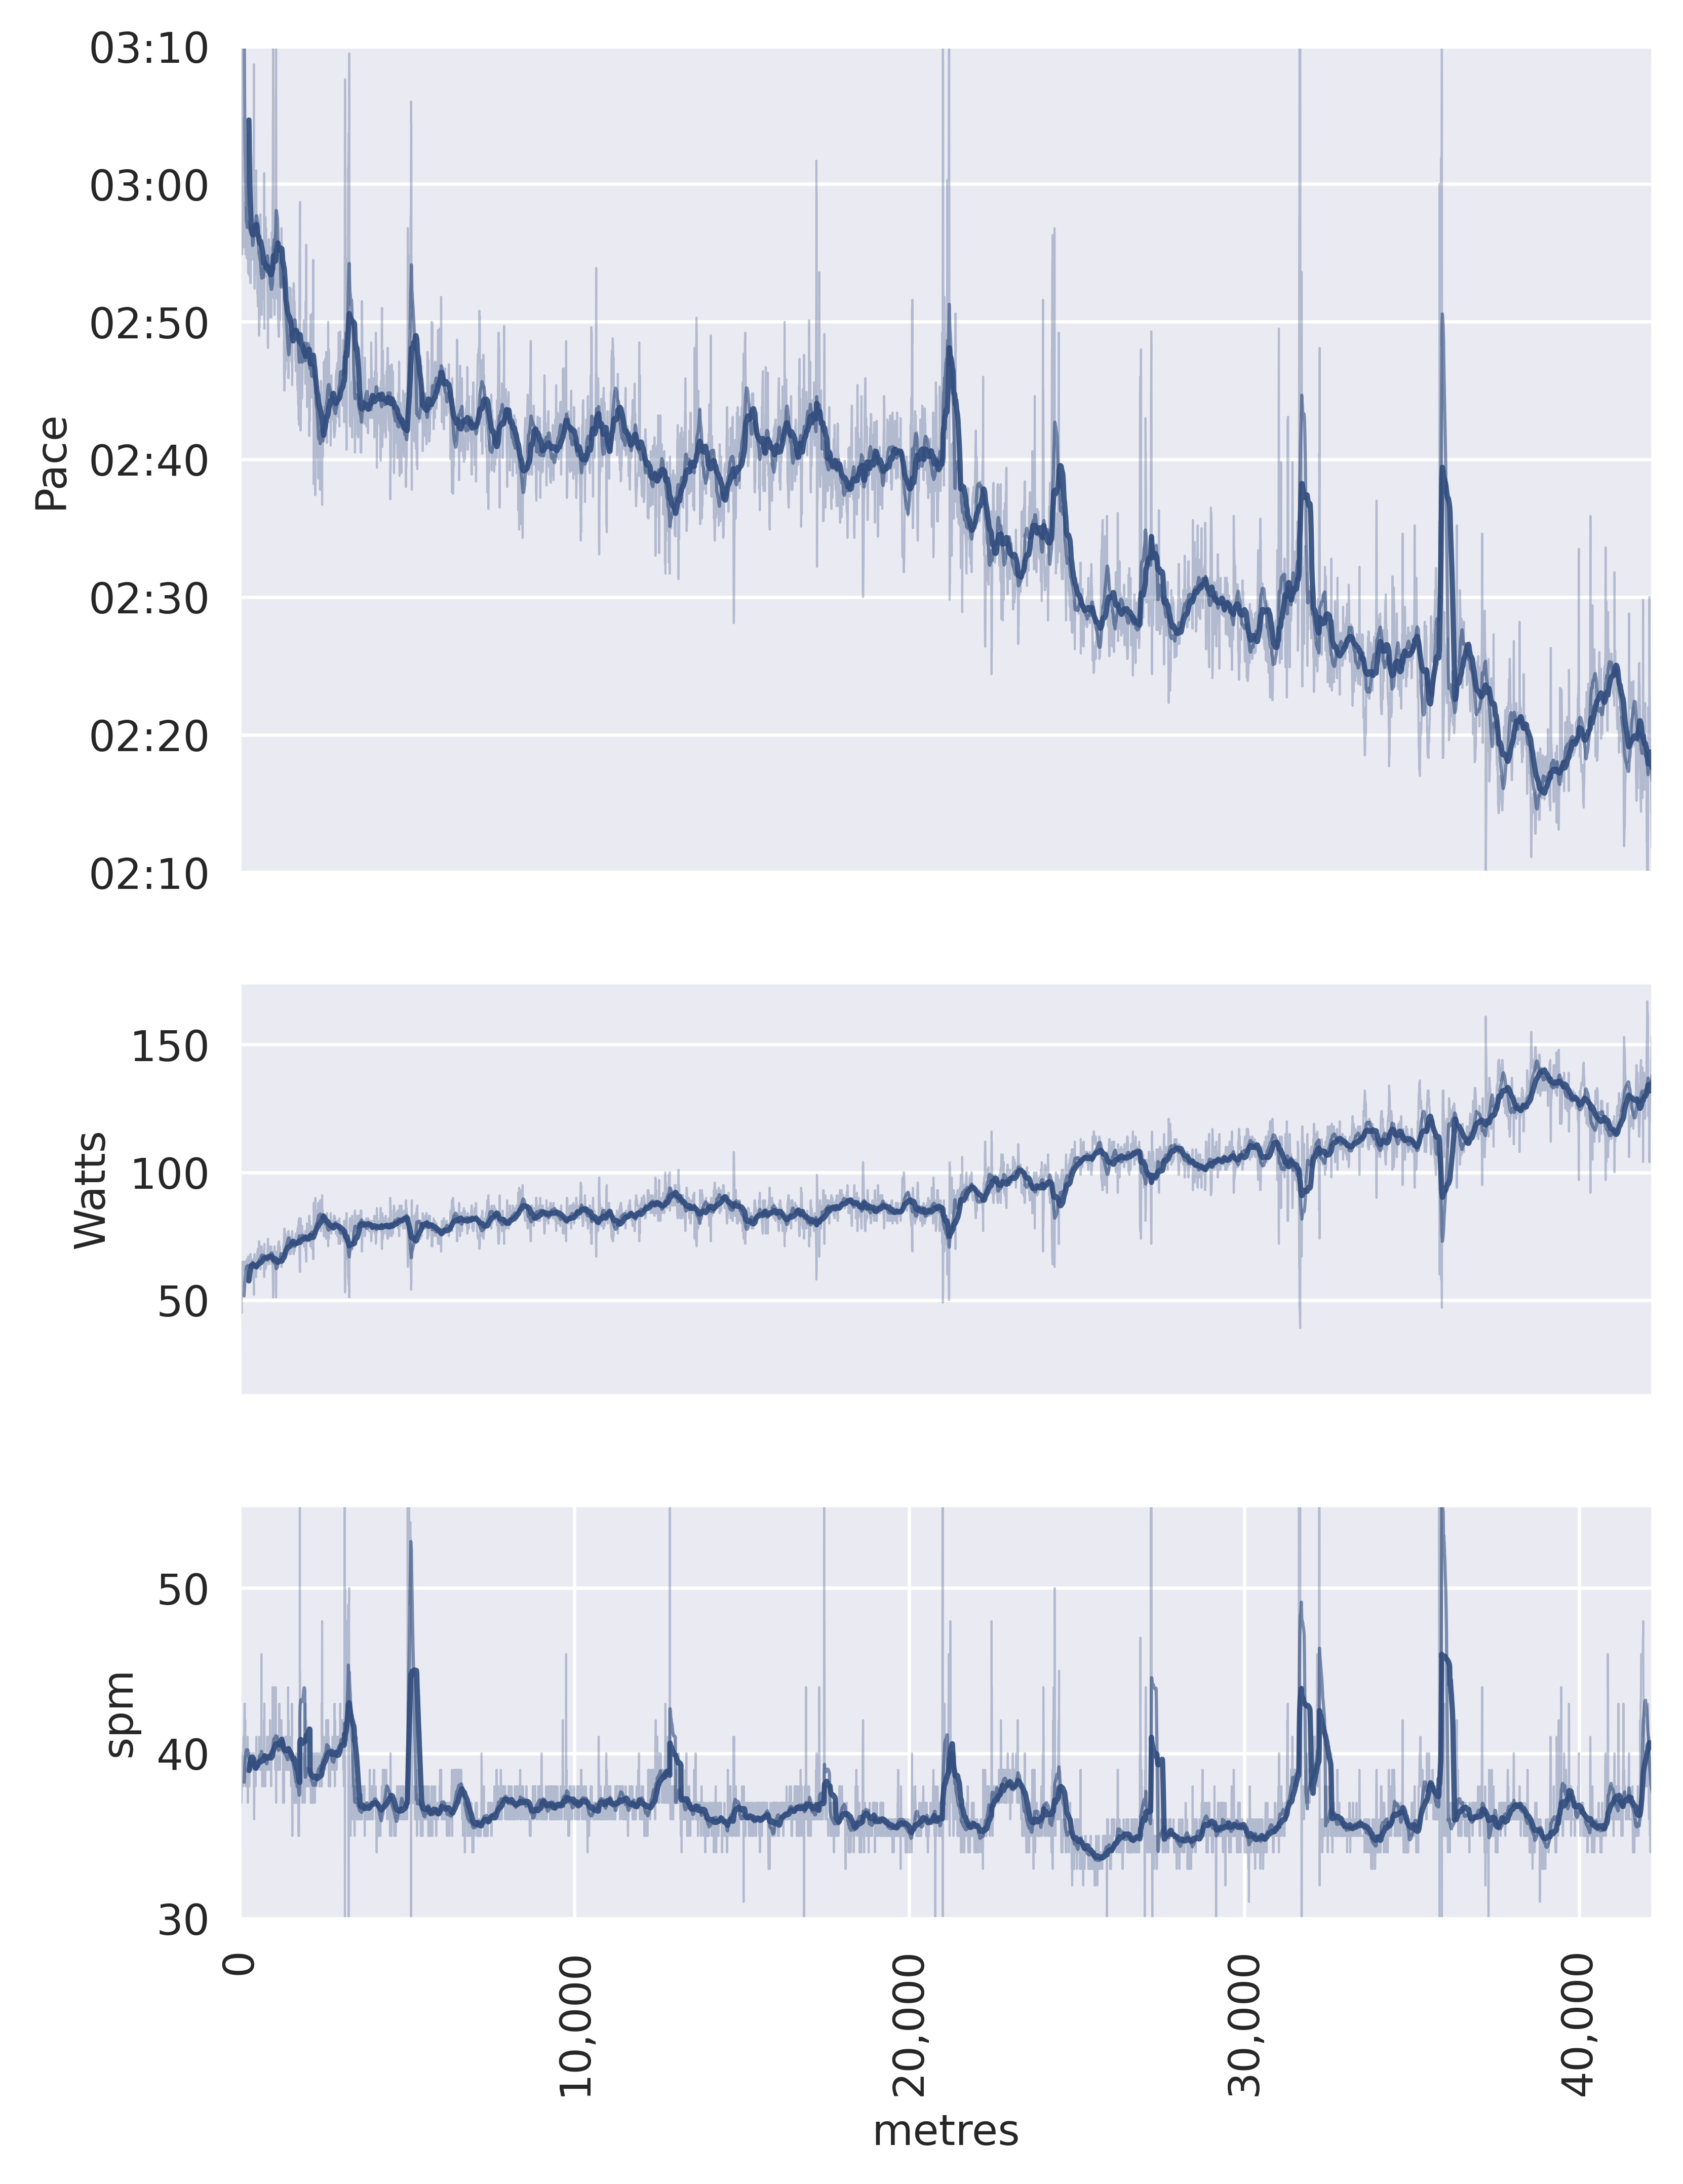

In [3]:
#| label: fig-skierg-marathon
#| fig-cap: >
#|     Stroke level data for the SkiErg marathon.

fig = plt.figure(figsize=(6, 8), dpi=600)

gs = gridspec.GridSpec(3, 1, height_ratios=[2,1,1])
gs.update(hspace=0.2)

ax1 = plt.subplot(gs[0])
ax1.set_ylim(pd.to_datetime(190, unit="s"), pd.to_datetime(130, unit="s"))
ax1.plot(data["Distance (meters)"], pd.to_datetime(data["Pace (seconds)"], unit="s"), color="#2f4b7c", alpha=0.3, linewidth=0.5)
ax1.plot(data["Distance (meters)"], pd.to_datetime(data["Pace (seconds)"].rolling(33).mean(), unit="s"), color="#2f4b7c", alpha=0.6, linewidth=0.75)
ax1.plot(data["Distance (meters)"], pd.to_datetime(data["Pace (seconds)"].rolling(66).mean(), unit="s"), color="#2f4b7c", alpha=0.9, linewidth=1.25)
ax1.set_ylabel("Pace")
ax1.xaxis.set_visible(False)
ax1.yaxis.set_major_formatter(dates.DateFormatter(fmt="%M:%S"))
ax1.set_xlim(0, 42195)
plt.gca().invert_yaxis()

ax2 = plt.subplot(gs[1])
ax2.plot(data["Distance (meters)"], data["Watts"], color="#2f4b7c", alpha=0.3, linewidth=0.5)
ax2.plot(data["Distance (meters)"], data["Watts"].rolling(33).mean(), color="#2f4b7c", alpha=0.6, linewidth=0.75)
ax2.plot(data["Distance (meters)"], data["Watts"].rolling(66).mean(), color="#2f4b7c", alpha=0.9, linewidth=1.25)
ax2.set_ylabel("Watts")
ax2.set_xlim(0, 42195)
ax2.xaxis.set_visible(False)

ax3 = plt.subplot(gs[2])
ax3.plot(data["Distance (meters)"], data["Stroke Rate"], color="#2f4b7c", alpha=0.3, linewidth=0.5)
ax3.plot(data["Distance (meters)"], data["Stroke Rate"].rolling(33).mean(), color="#2f4b7c", alpha=0.6, linewidth=0.75)
ax3.plot(data["Distance (meters)"], data["Stroke Rate"].rolling(66).mean(), color="#2f4b7c", alpha=0.9, linewidth=1.25)
ax3.set_ylim(30, 55)
ax3.set_ylabel("spm")

ax3.xaxis.set_major_formatter(ticker.StrMethodFormatter("{x:,.0f}"))
ax3.set_xticks(ax3.get_xticks())
ax3.set_xticklabels(ax3.get_xticklabels(), rotation=90)
ax3.set_xlabel("metres")
ax3.set_xlim(0, 42195)

plt.show()

In [4]:
data["ddistance"] = data["Distance (meters)"].diff()
data["dtime"] = data["Time (seconds)"].diff()

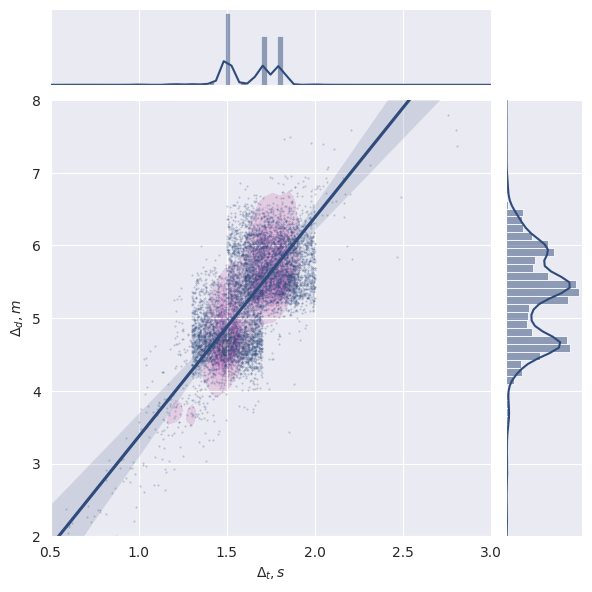

In [6]:
#| label: fig-skierg-marathon-regression
#| fig-cap: >
#|     Stroke level data of stroke length (metres) versus stroke duration (seconds).

g = sns.jointplot(data=data, 
                  x="dtime", 
                  y="ddistance", 
                  xlim=(0.5, 3), 
                  ylim=(2, 8), 
                  color="#2f4b7c", 
                  kind="reg", 
                  x_jitter=0.2, 
                  y_jitter=0.2, 
                  scatter_kws=dict(alpha=0.3, s=0.2))
g.plot_joint(sns.kdeplot, 
             color="#a05195", 
             zorder=0, 
             levels=16, 
             alpha=0.6, 
             fill=True)
g.set_axis_labels(ylabel="$\Delta_{d}, m$", 
                  xlabel="$\Delta_t, s$")
plt.show()